<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Modeling-Your-Data---Lab" data-toc-modified-id="Modeling-Your-Data---Lab-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modeling Your Data - Lab</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Objectives</a></span></li><li><span><a href="#Build-an-Initial-Regression-Model" data-toc-modified-id="Build-an-Initial-Regression-Model-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Build an Initial Regression Model</a></span></li><li><span><a href="#Remove-the-Uninfluential-Features" data-toc-modified-id="Remove-the-Uninfluential-Features-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Remove the Uninfluential Features</a></span></li><li><span><a href="#Investigate-Multicollinearity" data-toc-modified-id="Investigate-Multicollinearity-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Investigate Multicollinearity</a></span></li><li><span><a href="#Perform-Another-Round-of-Feature-Selection" data-toc-modified-id="Perform-Another-Round-of-Feature-Selection-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Perform Another Round of Feature Selection</a></span></li><li><span><a href="#Check-the-Normality-Assumption" data-toc-modified-id="Check-the-Normality-Assumption-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Check the Normality Assumption</a></span></li><li><span><a href="#Check-Homoscedasticity-Assumption" data-toc-modified-id="Check-Homoscedasticity-Assumption-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Check Homoscedasticity Assumption</a></span></li><li><span><a href="#Make-Additional-Refinements" data-toc-modified-id="Make-Additional-Refinements-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Make Additional Refinements</a></span></li><li><span><a href="#Summary" data-toc-modified-id="Summary-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Summary</a></span></li></ul></li></ul></div>

# Modeling Your Data - Lab

## Introduction 

In this lab you'll perform a full linear regression analysis on the data. You'll implement the process demonstrated in the previous lesson, taking a stepwise approach to analyze and improve the model along the way.

## Objectives
You will be able to:

* Perform a full linear regression with iterations based on p-value of features and other parameters
* Create visualizations to better understand the distributions of variables in a dataset
* Determine whether or not the assumptions for linear regression hold true for this example

## Build an Initial Regression Model

To start, perform a train-test split and create an initial regression model to model the `list_price` using all of your available features.

> **Note:** In order to write the model you'll have to do some tedious manipulation of your column names. Statsmodels will not allow you to have spaces, apostrophe or arithmetic symbols (+) in your column names. Preview them and refine them as you go.  
**If you receive an error such as "PatsyError: error tokenizing input (maybe an unclosed string?)", then you need to further preprocess your column names.**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.model_selection import train_test_split

In [2]:
# Import the dataset 'Lego_dataset_cleaned.csv'
df = pd.read_csv('Lego_dataset_cleaned.csv')
df.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10+,ages_10-14,ages_10-16,ages_10-21,...,country_NZ,country_PL,country_PT,country_US,review_difficulty_Average,review_difficulty_Challenging,review_difficulty_Easy,review_difficulty_Very Challenging,review_difficulty_Very Easy,review_difficulty_unknown
0,-0.273020,29.99,-0.398512,-0.655279,-0.045687,-0.365010,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,-0.404154,19.99,-0.398512,-0.655279,0.990651,-0.365010,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,-0.517242,12.99,-0.147162,-0.132473,-0.460222,-0.204063,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,0.635296,99.99,0.187972,-1.352353,0.161581,0.117830,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0.288812,79.99,-0.063378,-2.049427,0.161581,-0.204063,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [3]:
# Your code here - Manipulate column names
#list(df.columns.values)

# Method 1: rename all column names, can be hard with 103
# x_cols = ['Passengers', 'Length', 'Wheelbase', 'Width', 'U_Turn_Space',
#           'Rear_seat', 'Luggage', 'Weight', 'Horsepower', 'Fueltank']

# Method 2: replace the offending characters
# df.list_price = df.list_price.str.replace('$','')
    
# Found this code in a Medium Blog by Chaim Gluck
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('+', '').str.replace('½', 'half')
df.columns = df.columns.str.replace('™', '').str.replace('®', '').str.replace('-', '_').str.replace('.','').str.replace("'","")

list(df.columns.values)

['piece_count',
 'list_price',
 'num_reviews',
 'play_star_rating',
 'star_rating',
 'val_star_rating',
 'ages_10',
 'ages_10_14',
 'ages_10_16',
 'ages_10_21',
 'ages_11_16',
 'ages_12',
 'ages_12_16',
 'ages_14',
 'ages_16',
 'ages_1half_3',
 'ages_1half_5',
 'ages_2_5',
 'ages_4',
 'ages_4_7',
 'ages_4_99',
 'ages_5',
 'ages_5_12',
 'ages_5_8',
 'ages_6',
 'ages_6_12',
 'ages_6_14',
 'ages_7',
 'ages_7_12',
 'ages_7_14',
 'ages_8',
 'ages_8_12',
 'ages_8_14',
 'ages_9',
 'ages_9_12',
 'ages_9_14',
 'ages_9_16',
 'theme_name_angry_birds',
 'theme_name_architecture',
 'theme_name_boost',
 'theme_name_blues_helicopter_pursuit',
 'theme_name_brickheadz',
 'theme_name_carnotaurus_gyrosphere_escape',
 'theme_name_city',
 'theme_name_classic',
 'theme_name_creator_3_in_1',
 'theme_name_creator_expert',
 'theme_name_dc_comics_super_heroes',
 'theme_name_dc_super_hero_girls',
 'theme_name_dimensions',
 'theme_name_duplo',
 'theme_name_dilophosaurus_outpost_attack',
 'theme_name_disney',
 'th

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10870 entries, 0 to 10869
Columns: 103 entries, piece_count to review_difficulty_unknown
dtypes: float64(6), int64(97)
memory usage: 8.5 MB


In [29]:
# Your code here - Define the target and predictors
# target = df['list_price']
# x_cols = df.copy()
# x_cols = x_cols.drop('list_price',axis=1)
# x_cols.head()
outcome = 'list_price'
x_cols = list(df.columns)
x_cols.remove(outcome)

In [20]:
# outcome = df.list_price
# outcome.head()
#target.dtypes

dtype('float64')

In [30]:
# Your code here - Split into train and test

# This is a different application of train/test split than in section 8
from sklearn.model_selection import train_test_split

train, test = train_test_split(df)
test.head()

,piece_count,list_price,num_reviews,play_star_rating,star_rating,val_star_rating,ages_10,ages_10_14,ages_10_16,ages_10_21,...,country_nz,country_pl,country_pt,country_us,review_difficulty_average,review_difficulty_challenging,review_difficulty_easy,review_difficulty_very_challenging,review_difficulty_very_easy,review_difficulty_unknown
4274,-0.140682,54.8878,-0.286801,-0.306741,0.368848,-0.043117,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1516,-0.491978,30.4878,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7741,-0.502805,12.1878,-0.286801,0.216064,0.161581,0.117830,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
10458,-0.514836,12.1878,-0.342657,0.738870,0.990651,0.439724,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3248,-0.455886,27.4380,-0.426440,1.087407,-1.082024,-0.365010,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [31]:
# Your code here - Fit the actual model            
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary()            

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     576.2
Date:                Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:52:50   Log-Likelihood:                -40320.
No. Observations:                8152   AIC:                         8.083e+04
Df Residuals:                    8057   BIC:                         8.150e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
Intercept                                           64.2480      1.942     33.075      0.000      60.440      68.056
piece_count                                         75.0835      0.867     86.633      0.000      73.385      76.782
num_reviews                                          6.6860      0.669     10.000      0.000       5.375       7.997
play_star_rating                                     5.0965      0.611      8.335      0.000       3.898       6.295
star_rating                                         -1.5800      0.691     -2.288      0.022      -2.934      -0.226
val_star_rating                                     -8.2727      0.616    -13.420      0.000      -9.481      -7.064
ages_10                                            119.6086      6.565     18.219      0.000     106.739     132.478
ages_10_14                                         -23.2974      9.284     -2.510      0.012     -41.496      -5.099
ages_10_16                                         -12.2306      4.115     -2.972      0.003     -20.297      -4.164
ages_10_21                                          52.7816      7.424      7.110      0.000      38.229      67.335
ages_11_16                                         -17.8715      5.561     -3.214      0.001     -28.772      -6.971
ages_12                                             70.8059      5.474     12.935      0.000      60.076      81.536
ages_12_16                                         -56.1701      6.552     -8.573      0.000     -69.013     -43.327
ages_14                                             24.2499      4.056      5.979      0.000      16.300      32.200
ages_16                                             35.7641      5.959      6.002      0.000      24.083      47.445
ages_1half_3                                        -9.3250      2.352     -3.965      0.000     -13.935      -4.714
ages_1half_5                                        -3.1768      3.033     -1.048      0.295      -9.122       2.768
ages_2_5                                            13.9734      1.677      8.335      0.000      10.687      17.260
ages_4                                             -19.6826      6.333     -3.108      0.002     -32.097      -7.268
ages_4_7                                            -6.1598      3.121     -1.974      0.048     -12.277      -0.043
ages_4_99                                           -2.3514      3.596     -0.654      0.513      -9.400       4.697
ages_5                                              -9.3156      2.881     -3.233      0.001     -14.964      -3.667
ages_5_12                                          -35.6735      3.211    -11.111      0.000     -41.967     -29.380
ages_5_8                                 

## Remove the Uninfluential Features

Based on the initial model, remove those features which do not appear to be statistically relevant and rerun the model.

In [32]:
# Your code here - Remove features which do not appear to be statistically relevant
# Since my code didn't work above, I am going to assume the relevant features are are piece_count, num_reviews and the
# 3 ratings
x_cols = ['piece_count', 'num_reviews', 'play_star_rating', 'star_rating', 'val_star_rating']
# x_cols.head()
# x_cols.dtypes

In [33]:
# Your code here - Refit the model
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=train).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     5765.
Date:                Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:54:07   Log-Likelihood:                -42486.
No. Observations:                8152   AIC:                         8.498e+04
Df Residuals:                    8146   BIC:                         8.503e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           66.6540      0.492    135.537      0.000      65.690      67.618
piece_count         83.9199      0.585    143.396      0.000      82.773      85.067
num_reviews         -3.2153      0.602     -5.345      0.000      -4.395      -2.036
play_star_rating     7.4387      0.632     11.769      0.000       6.200       8.678
star_rating         -1.3579      0.797     -1.703      0.089      -2.921       0.205
val_star_rating    -12.8928      0.717    -17.972      0.000     -14.299     -11.487
==============================================================================
Omnibus:                     8547.144   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           978409.190
Skew:                           5.061   Prob(JB):                         0.00
Kurtosis:                      55.707   Cond. No.                         2.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> **Comment:** You should see that the model performance is identical. Additionally, observe that there are further features which have been identified as unimpactful. Continue to refine the model accordingly.

In [ ]:
# Your code here - Continue to refine the model

In [ ]:
# Your code here - Refit the model

## Investigate Multicollinearity

There are still a lot of features in the current model! Chances are there are some strong multicollinearity issues. Begin to investigate the extent of this problem.

In [34]:
# Your code here - Code a way to identify multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('piece_count', 1.4390371041047354),
 ('num_reviews', 1.438953431568915),
 ('play_star_rating', 1.643254507546674),
 ('star_rating', 2.6555918395207185),
 ('val_star_rating', 2.141388189260584)]

## Perform Another Round of Feature Selection

Once again, subset your features based on your findings above. Then rerun the model once again.

In [ ]:
# Your code here - Subset features based on multicollinearity

In [ ]:
# Your code here - Refit model with subset features

## Check the Normality Assumption

Check whether the normality assumption holds for your model.

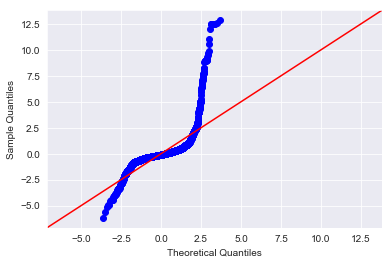

In [35]:
# Your code here - Check that the residuals are normally distributed
import statsmodels.api as sm
import scipy.stats as stats
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

## Check Homoscedasticity Assumption

Check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

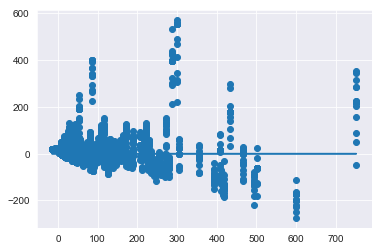

In [39]:
# Your code here - Check that the residuals are homoscedastic
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

> **Comment:** This displays a fairly pronounced 'funnel' shape: errors appear to increase as the `list_price` increases. This doesn't bode well for our model. Subsetting the data to remove outliers and confining the model to this restricted domain may be necessary. A log transformation or something equivalent may also be appropriate.

## Make Additional Refinements

From here, make additional refinements to your model based on the above analysis. As you progress, continue to go back and check the assumptions for the updated model. Be sure to attempt at least two additional model refinements.

> **Comment:** Based on the above plots, it seems as though outliers are having a substantial impact on the model. As such, removing outliers may be appropriate. Investigating the impact of a log transformation is also worthwhile.

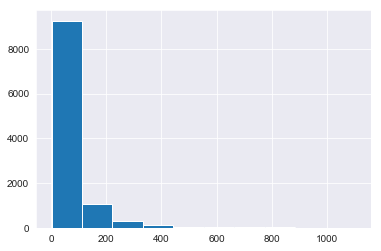

In [40]:
# Your code here - Check for outliers
df.list_price.hist()

In [42]:
for i in range(70, 100):
    q = i / 100
    print('{} percentile: {}'.format(q, df['list_price'].quantile(q=q)))

0.7 percentile: 60.98779999999999
0.71 percentile: 62.986000000000004
0.72 percentile: 67.0878
0.73 percentile: 67.152
0.74 percentile: 70.1922
0.75 percentile: 73.1878
0.76 percentile: 75.9924
0.77 percentile: 79.28779999999998
0.78 percentile: 81.7278
0.79 percentile: 85.3878
0.8 percentile: 90.986
0.81 percentile: 92.66216100000052
0.82 percentile: 97.5878
0.83 percentile: 101.898
0.84 percentile: 109.13971199999885
0.85 percentile: 110.352
0.86 percentile: 119.96492
0.87 percentile: 121.9878
0.88 percentile: 121.9878
0.89 percentile: 134.18779999999998
0.9 percentile: 143.952
0.91 percentile: 153.986
0.92 percentile: 170.7878
0.93 percentile: 182.9878
0.94 percentile: 198.7929
0.95 percentile: 220.03032999999942
0.96 percentile: 251.90543999999994
0.97 percentile: 292.7878
0.98 percentile: 359.88
0.99 percentile: 463.5878


In [43]:
# Your code here
orig_tot = len(df)
df = df[df.list_price < 450] # Subsetting to remove extreme outliers
print('Percent removed:', (orig_tot -len(df))/orig_tot)
df.list_price = df.list_price.map(np.log) # Applying a log transformation
train, test = train_test_split(df)

# Refit model with subset features
predictors = '+'.join(x_cols)
formula = outcome + "~" + predictors
model = ols(formula=formula, data=train).fit()
model.summary()

Percent removed: 0.010487580496780129


/Users/Annika/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             list_price   R-squared:                       0.562
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     2068.
Date:                Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                        14:02:05   Log-Likelihood:                -7279.5
No. Observations:                8067   AIC:                         1.457e+04
Df Residuals:                    8061   BIC:                         1.461e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.7128      0.007    557.894      0.000       3.700       3.726
piece_count          0.7825      0.009     86.580      0.000       0.765       0.800
num_reviews         -0.0179      0.008     -2.198      0.028      -0.034      -0.002
play_star_rating     0.1575      0.008     18.647      0.000       0.141       0.174
star_rating         -0.0336      0.011     -3.121      0.002      -0.055      -0.012
val_star_rating     -0.1799      0.010    -18.571      0.000      -0.199      -0.161
==============================================================================
Omnibus:                      463.309   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              607.183
Skew:                          -0.545   Prob(JB):                    1.42e-132
Kurtosis:                       3.787   Cond. No.                         2.98
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

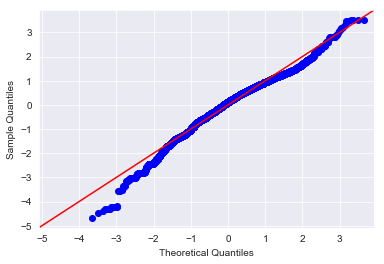

In [44]:
# Your code here - Check normality assumption
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

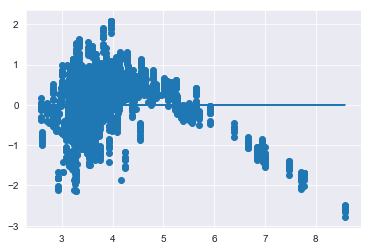

In [45]:
# Your code here - Check the Homoscedasticity Assumption
plt.scatter(model.predict(train[x_cols]), model.resid)
plt.plot(model.predict(train[x_cols]), [0 for i in range(len(train))])

In [ ]:
# Your code goes here


## Summary

Well done! As you can see, regression can be a challenging task that requires you to make decisions along the way, try alternative approaches, and make ongoing refinements. These choices depend on the context and specific use cases. 